In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture

In [2]:
# Define a function to calculate the residual image by subtracting the reconstructed image from the original
def calculate_residual(original_path, reconstructed_path):
    # Read the original and reconstructed images
    original = cv2.imread(original_path, cv2.IMREAD_UNCHANGED)
    reconstructed = cv2.imread(reconstructed_path, cv2.IMREAD_UNCHANGED)
    
    # Convert images to float for accurate subtraction
    original_float = original.astype(np.float32)
    reconstructed_float = reconstructed.astype(np.float32)
    
    # Calculate the residual
    residual = original_float - reconstructed_float
    
    # Clip values to the range [0, 255] and convert to uint8
    residual_clipped = np.clip(residual, 0, 255).astype(np.uint8)
    
    return residual_clipped

## PDF Enable Analysis

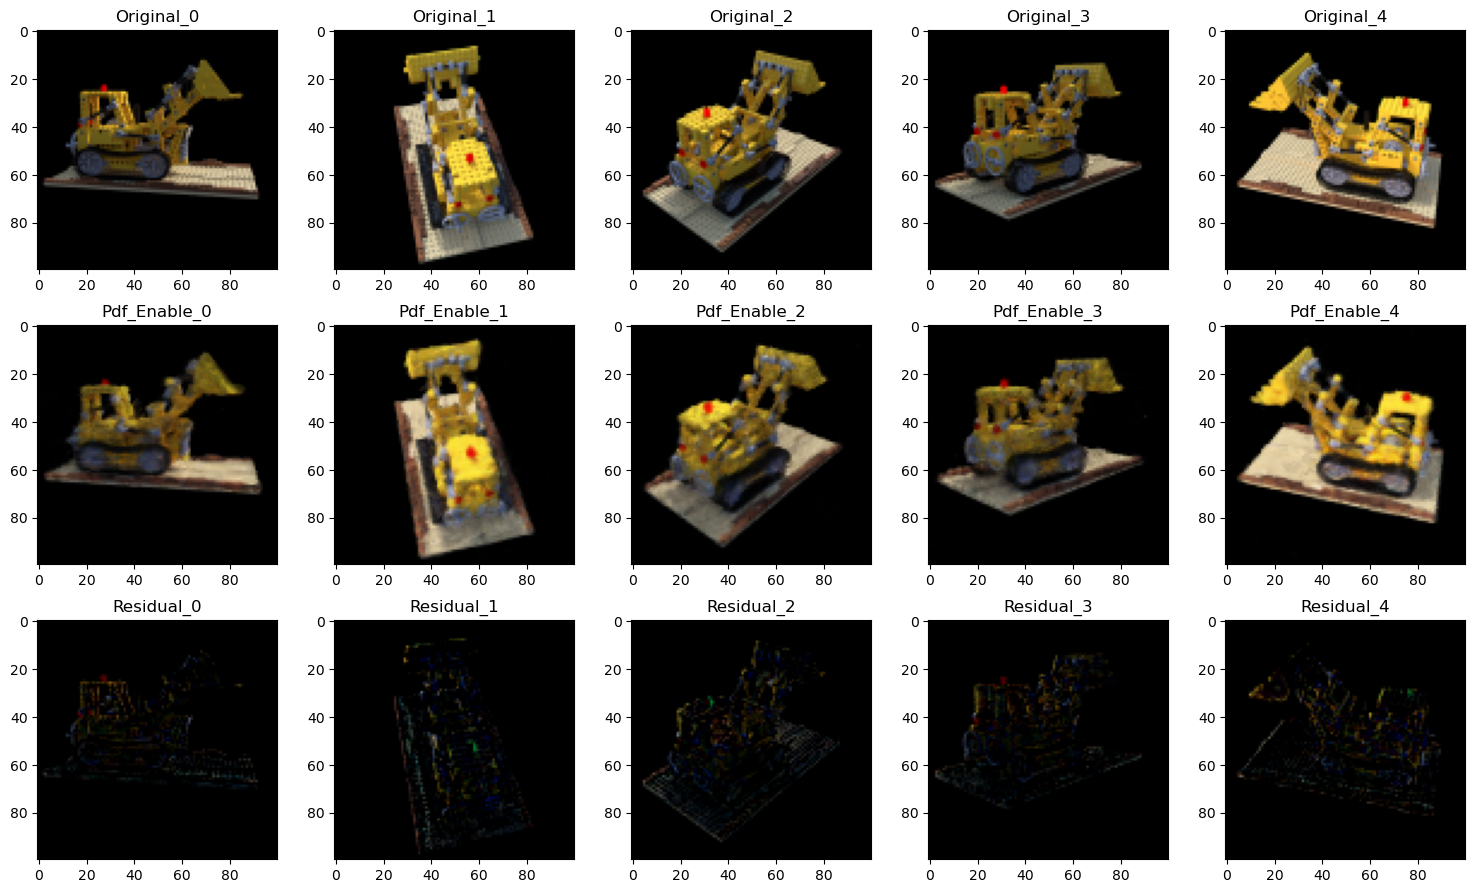

In [3]:
# Load the images
image_paths = [f'data_output_51_pdf/pdf_enabled/prediction_pdf_enable_{i}_51000.png' for i in range(5)]
images = [cv2.imread(i) for i in image_paths]

origin_paths = [f'data_output_51_pdf/pdf_enabled/original_pdf_enable_{i}_51000.png' for i in range(5)]
origin_images = [cv2.imread(i) for i in origin_paths]

residual_images = [calculate_residual(original_path,image_path) for original_path,image_path in zip(origin_paths,image_paths)]

fig, axs = plt.subplots(3, 5, figsize=(15, 9))
for i,image in enumerate(origin_images):
    axs[0,i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0,i].set_title(f"Original_{i}")
    
for i,image in enumerate(images):
    axs[1,i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[1,i].set_title(f"Pdf_Enable_{i}")
    
for i,image in enumerate(residual_images):
    axs[2,i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[2,i].set_title(f"Residual_{i}")
    
plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


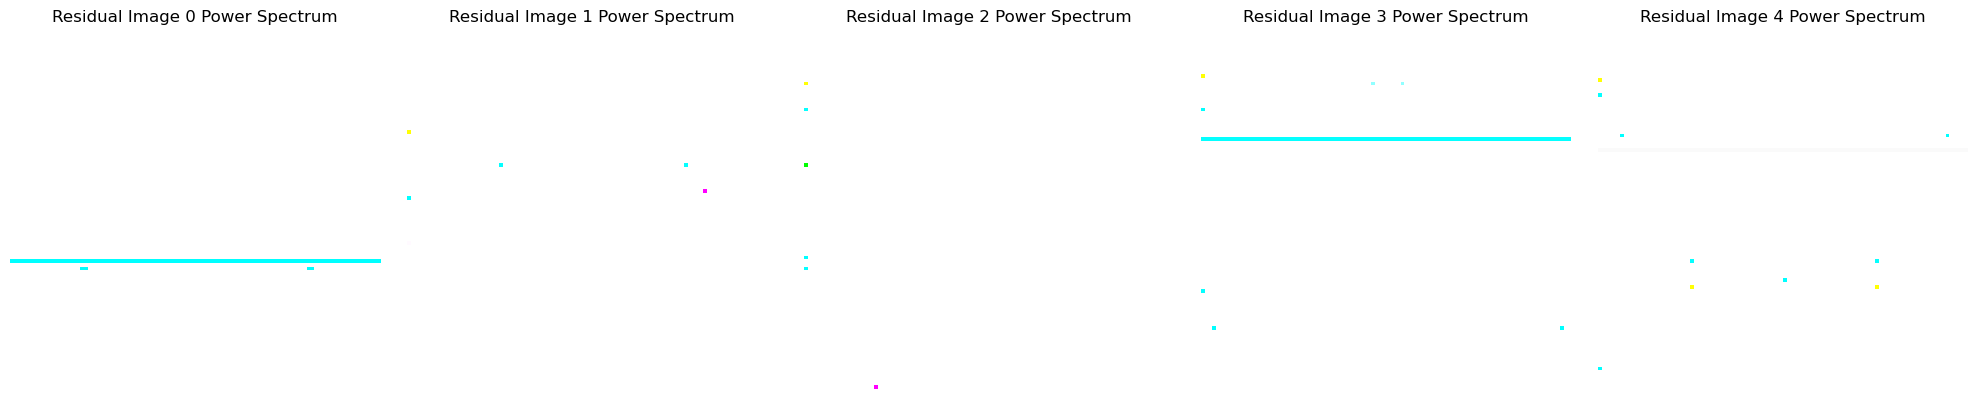

Residual Statistics:
[{'mean': 1.5223, 'std_dev': 5.804196990971275}, {'mean': 2.6539, 'std_dev': 8.300886385802423}, {'mean': 3.0619, 'std_dev': 8.553400983819243}, {'mean': 1.8843, 'std_dev': 6.754991747589334}, {'mean': 2.3126, 'std_dev': 7.6342439861455835}]


In [4]:
# Function to calculate the power spectrum of the noise
def power_spectrum(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift) + 0.001)
    return magnitude_spectrum



# Calculate the power spectrum for each image
power_spectra = [power_spectrum(img) for img in residual_images]

# Plot the power spectra
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for i, spectrum in enumerate(power_spectra):
    axs[i].imshow(spectrum, cmap = 'gray')
    axs[i].set_title(f'Residual Image {i} Power Spectrum')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

# Now let's calculate and print some statistics of the noise.
noise_statistics = []

for img in residual_images:
    # Calculate the mean and standard deviation of the noise
    mean, std_dev = cv2.meanStdDev(img)
    noise_statistics.append({'mean': mean[0][0], 'std_dev': std_dev[0][0]})

print("Residual Statistics:")

print(noise_statistics)

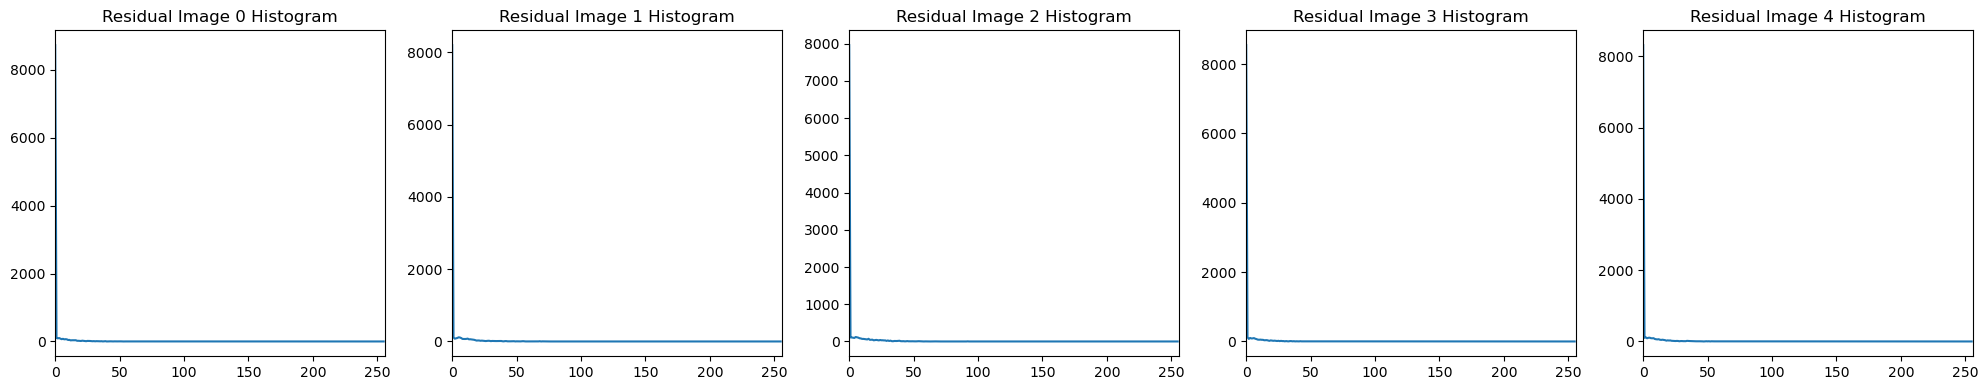

Skewness and Kurtosis


[(6.655635686214646, 58.7639189500752),
 (6.390076316942852, 54.49091732469731),
 (4.983495600490607, 32.54168349231276),
 (6.288819685833547, 52.686211886041306),
 (6.230463798930437, 54.10258867399438)]

In [5]:
from scipy.stats import skew, kurtosis

# Calculate additional statistics for each image: skewness and kurtosis
additional_statistics = []

for image in residual_images:
    # Flatten the image to 1D array for statistical analysis
    image_flattened = image.flatten()
    # Calculate skewness and kurtosis
    image_skewness = skew(image_flattened)
    image_kurtosis = kurtosis(image_flattened)
    additional_statistics.append((image_skewness, image_kurtosis))

# Calculate the histograms of the images to observe the distribution of pixel intensities
histograms = []

for image in residual_images:
    # Calculate the histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    histograms.append(hist)

# Plot the histograms
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, ax in enumerate(axes):
    ax.plot(histograms[i])
    ax.set_title(f'Residual Image {i} Histogram')
    ax.set_xlim([0, 256])

plt.tight_layout()
plt.show()

# Output the additional noise statistics
print("Skewness and Kurtosis")
additional_statistics

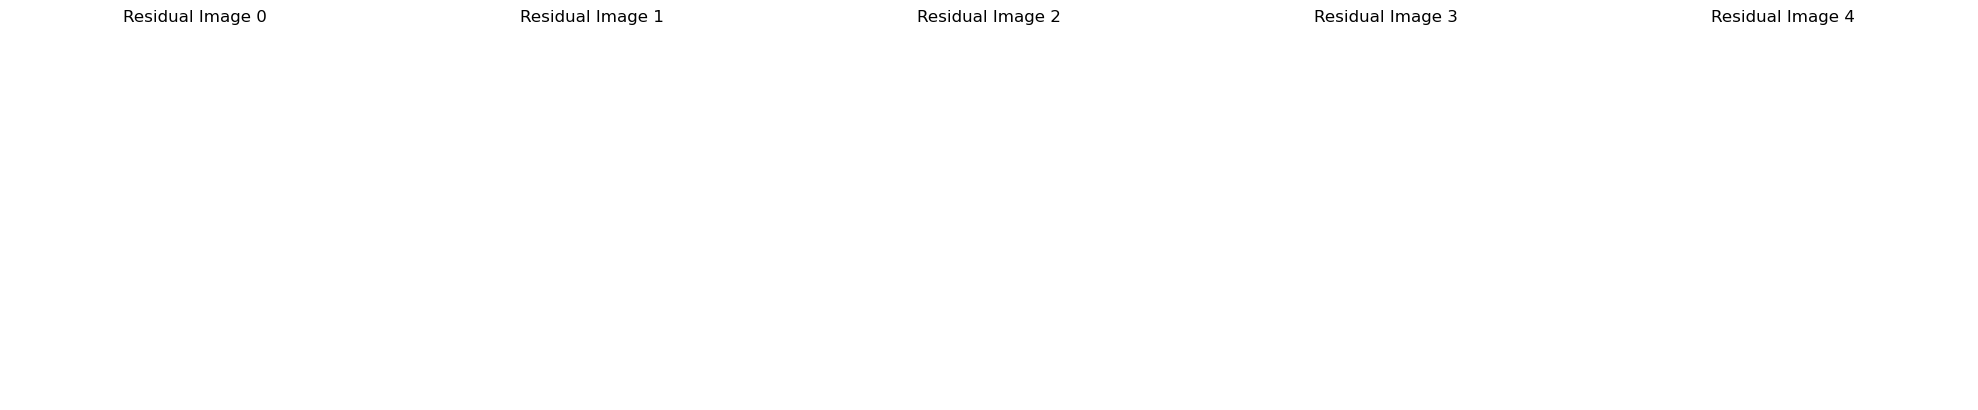

['data_output_51_pdf/pdf_enabled/Residual_0.png',
 'data_output_51_pdf/pdf_enabled/Residual_1.png',
 'data_output_51_pdf/pdf_enabled/Residual_2.png',
 'data_output_51_pdf/pdf_enabled/Residual_3.png',
 'data_output_51_pdf/pdf_enabled/Residual_4.png']

In [6]:
# Save the residual images and prepare their file paths for output
residual_paths = []
for i, residual in enumerate(residual_images):
    path = f'data_output_51_pdf/pdf_enabled/Residual_{i}.png'
    cv2.imwrite(path, residual)
    residual_paths.append(path)

# Plot the residual images
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, ax in enumerate(axes):
    ax.imshow(residual_images[i])
    ax.axis('off')
    ax.set_title(f'Residual Image {i}')

plt.tight_layout()
plt.show()

# Output the file paths of the residual images
residual_paths

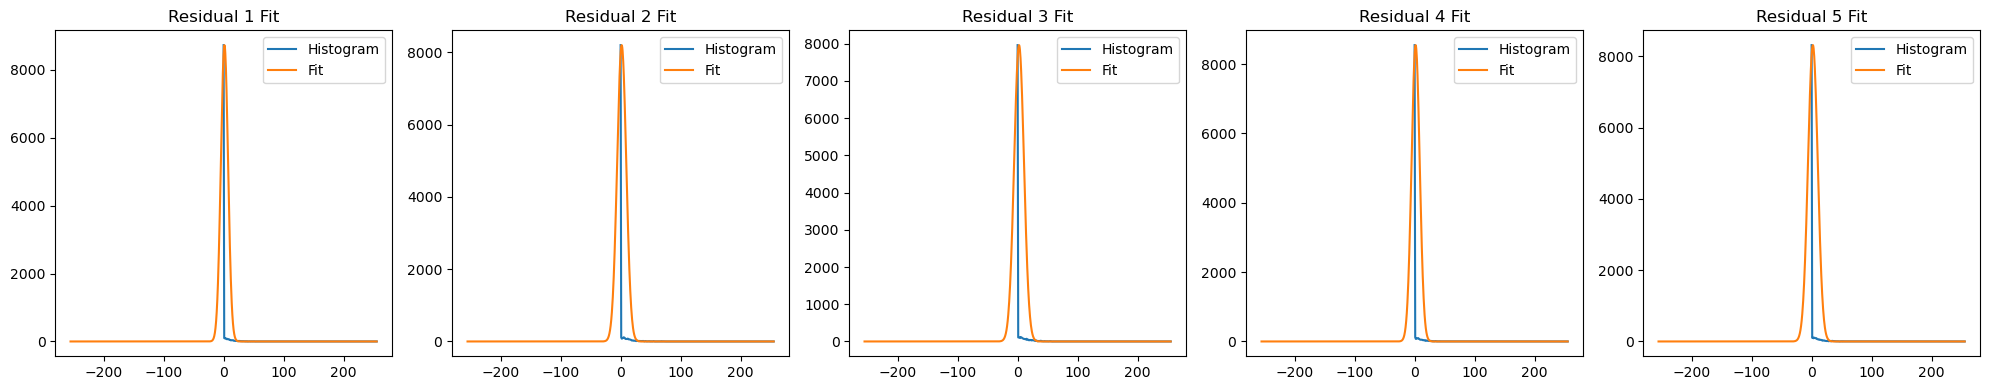

[(1.4, 6.0), (1.8, 7.6), (2.4, 8.2), (1.7, 6.8), (2.1, 8.1)]

In [7]:
# Function to analyze the distribution of the residuals
def analyze_residuals(residual_path):
    # Read the residual image
    residual = cv2.imread(residual_path, cv2.IMREAD_UNCHANGED)
    # Flatten the residual image to 1D array for statistical analysis
    residual_flattened = residual.flatten()
    # Calculate histogram of the residuals
    hist = cv2.calcHist([residual], [0], None, [256], [0, 256])
    return residual_flattened, hist

# Initialize lists to store analysis results
residual_data = []
histograms = []

# Analyze each residual image
for path in residual_paths:
    data, hist = analyze_residuals(path)
    residual_data.append(data)
    histograms.append(hist)

# Fit a normal distribution to the residuals
from scipy.stats import norm

# Parameters to store fitted distribution parameters
fitted_params = []

for data in residual_data:
    # Fit a normal distribution to the data
    mu, std = norm.fit(data)
    fitted_params.append((np.round(mu,1), np.round(std,1)))

# Plot the histograms and the fitted distributions
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

x = np.linspace(-255, 255, 1000)  # Range for plotting the fitted normal distributions

for i, ax in enumerate(axes):
    # Plot the histogram
    ax.plot(histograms[i], label='Histogram')
    # Plot the fitted distribution
    p = norm.pdf(x, fitted_params[i][0], fitted_params[i][1])
    ax.plot(x, p * np.max(histograms[i]) / np.max(p), label='Fit')  # Scale fitted line to histogram height
    ax.set_title(f'Residual {i+1} Fit')
    ax.legend()

plt.tight_layout()
plt.show()

# Output the fitted distribution parameters
fitted_params

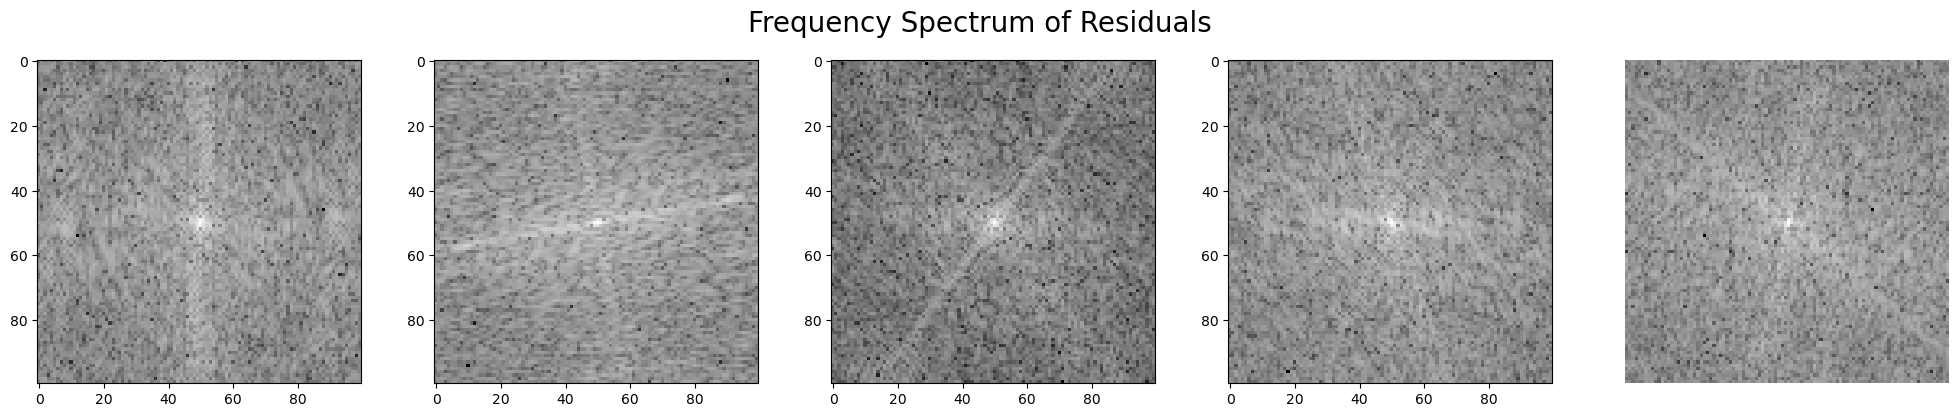

,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,ASM
0,47.860404,2.121414,0.825573,0.798678,0.421362,0.637887
1,87.152323,2.956768,0.794649,0.765011,0.365198,0.585242
2,86.216162,3.432121,0.747396,0.718609,0.463146,0.516399
3,55.946667,2.372929,0.799661,0.771844,0.473381,0.595743
4,97.090101,3.311313,0.765450,0.735844,0.378241,0.541466


In [12]:
from skimage.feature import graycomatrix, graycoprops
from numpy.fft import fft2, fftshift

# Function to calculate the frequency spectrum of an image using Fourier Transform
def calculate_frequency_spectrum(image):
    f = fft2(image)
    fshift = fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift))
    return magnitude_spectrum

# Function to calculate texture features using Grey Level Co-occurrence Matrix (GLCM)
def calculate_glcm_properties(image):
    # Compute GLCM on the image
    glcm = graycomatrix(image, distances=[1], angles=[0], symmetric=True, normed=True)
    # Compute GLCM properties
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    ASM = graycoprops(glcm, 'ASM')[0, 0]
    return contrast, dissimilarity, homogeneity, energy, correlation, ASM

# Choose one of the residual images to analyze

residual_images = [cv2.imread(residual_image_path, cv2.IMREAD_GRAYSCALE) for residual_image_path in residual_paths]

# Calculate frequency spectrum
frequency_spectrum = [calculate_frequency_spectrum(residual_image) for residual_image in residual_images]

# Calculate GLCM properties
glcm_properties = [calculate_glcm_properties(residual_image) for residual_image in residual_images]


# Plot the histograms and the fitted distributions
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
# Plot the frequency spectrum
for i, ax in enumerate(axes):
    # Plot the histogram
    ax.imshow(frequency_spectrum[i], cmap = "gray")

plt.suptitle('Frequency Spectrum of Residuals',fontsize = 20)
plt.axis('off')
plt.tight_layout()
plt.show()



# Output the GLCM properties
pd.DataFrame(glcm_properties,columns = ["Contrast","Dissimilarity","Homogeneity","Energy","Correlation","ASM"])

In [13]:
# Calculate statistical measures of the frequency spectra
spectra_stats = []
for spectrum in frequency_spectrum:
    mean = np.mean(spectrum)
    std = np.std(spectrum)
    max_val = np.max(spectrum)
    min_val = np.min(spectrum)
    spectra_stats.append({'mean': mean, 'std': std, 'max': max_val, 'min': min_val})

pd.DataFrame(spectra_stats)

,mean,std,max,min
0,5.937587,0.747019,9.825688,0.782681
1,6.141430,0.761515,10.057667,0.662207
2,6.245257,0.732899,10.352651,2.290697
3,6.014927,0.755682,10.010636,0.713168
4,6.293583,0.731912,10.211340,0.907881


In [14]:
# Function to calculate GLCM properties for all four angles (0, 45, 90, 135 degrees)
def calculate_glcm_properties_all_angles(image):
    # Compute GLCM on the image for four angles
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Angles in radians: 0, 45, 90, 135 degrees
    glcm = graycomatrix(image, distances=[1], angles=angles, symmetric=True, normed=True)
    # Compute GLCM properties for each angle
    properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
    glcm_properties = {prop: [graycoprops(glcm, prop)[0, i] for i in range(4)] for prop in properties}
    return glcm_properties

# Calculate GLCM properties for all angles for each residual image
glcm_properties_all_images = [calculate_glcm_properties_all_angles(cv2.imread(path, cv2.IMREAD_GRAYSCALE)) for path in residual_paths]

pd.DataFrame(glcm_properties_all_images)

,contrast,dissimilarity,homogeneity,energy,correlation,ASM
0,"[47.860404040404, 63.22762983368986, 44.597979...","[2.1214141414141316, 2.6764615855524685, 2.175...","[0.8255729850771152, 0.7986584539239757, 0.813...","[0.7986783095455722, 0.7774592004580224, 0.789...","[0.4213617786715747, 0.2425681877052478, 0.460...","[0.6378870421385727, 0.6044428083768275, 0.623..."
1,"[87.1523232323223, 94.87786960514127, 55.37333...","[2.9567676767676527, 3.2592592592592218, 2.369...","[0.7946491434893976, 0.7758068763100967, 0.800...","[0.7650112082579866, 0.7485679720356115, 0.771...","[0.36519817562959495, 0.31527769323864446, 0.5...","[0.5852421487603446, 0.5603540087575082, 0.595..."
2,"[86.21616161616119, 99.04071013161762, 80.5723...","[3.432121212121193, 3.7673706764615456, 3.3834...","[0.7473959995940577, 0.7307926826308546, 0.746...","[0.7186090554637137, 0.7033985411806628, 0.716...","[0.4631461426669489, 0.3886862463144486, 0.498...","[0.5163989745944507, 0.4947695077350846, 0.513..."
3,"[55.94666666666642, 72.09488827670587, 46.4670...","[2.3729292929292822, 2.922354861748778, 2.3088...","[0.7996605926009379, 0.7759140127273392, 0.792...","[0.7718438106733122, 0.7500643735023842, 0.763...","[0.47338129018165775, 0.32751974710946247, 0.5...","[0.5957428680746999, 0.5625965643975241, 0.582..."
4,"[97.09010101010037, 121.74757677787807, 81.610...","[3.3113131313131157, 3.9463320069380146, 3.168...","[0.7654498870896969, 0.7466863027096198, 0.762...","[0.7358437357680314, 0.7185695062673998, 0.732...","[0.37824088432462594, 0.22737746120060331, 0.4...","[0.5414660034690525, 0.5163421353373747, 0.537..."


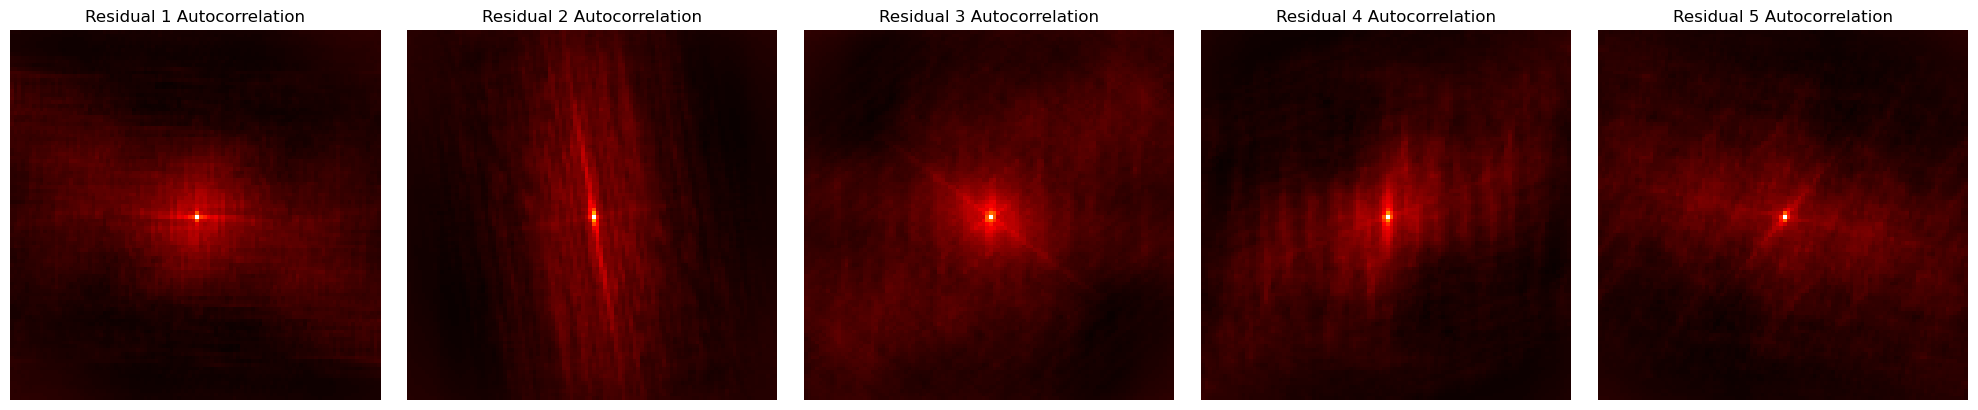

In [15]:
from scipy.signal import correlate2d

# Function to calculate 2D autocorrelation of an image
def calculate_autocorrelation(image):
    # Normalize image
    image_normalized = image - np.mean(image)
    # Calculate autocorrelation using correlate2d
    autocorr = correlate2d(image_normalized, image_normalized, mode='full')
    # Normalize autocorrelation by the maximum value to bring the values between [0, 1]
    autocorr_normalized = autocorr / np.max(autocorr)
    return autocorr_normalized

# Calculate 2D autocorrelation for each residual image
autocorrelations = [calculate_autocorrelation(cv2.imread(path, cv2.IMREAD_GRAYSCALE)) for path in residual_paths]

# Plot the 2D autocorrelation for each residual image
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axes):
    # Select the central part of the autocorrelation for display
    center = tuple(map(lambda x: x // 2, autocorrelations[i].shape))
    extent = 50  # We will display a 50x50 region around the center
    autocorr_display = autocorrelations[i][
        center[0]-extent:center[0]+extent, 
        center[1]-extent:center[1]+extent
    ]
    ax.imshow(autocorr_display, cmap='hot')
    ax.axis('off')
    ax.set_title(f'Residual {i+1} Autocorrelation')

plt.tight_layout()
plt.show()


## Pdf Disable

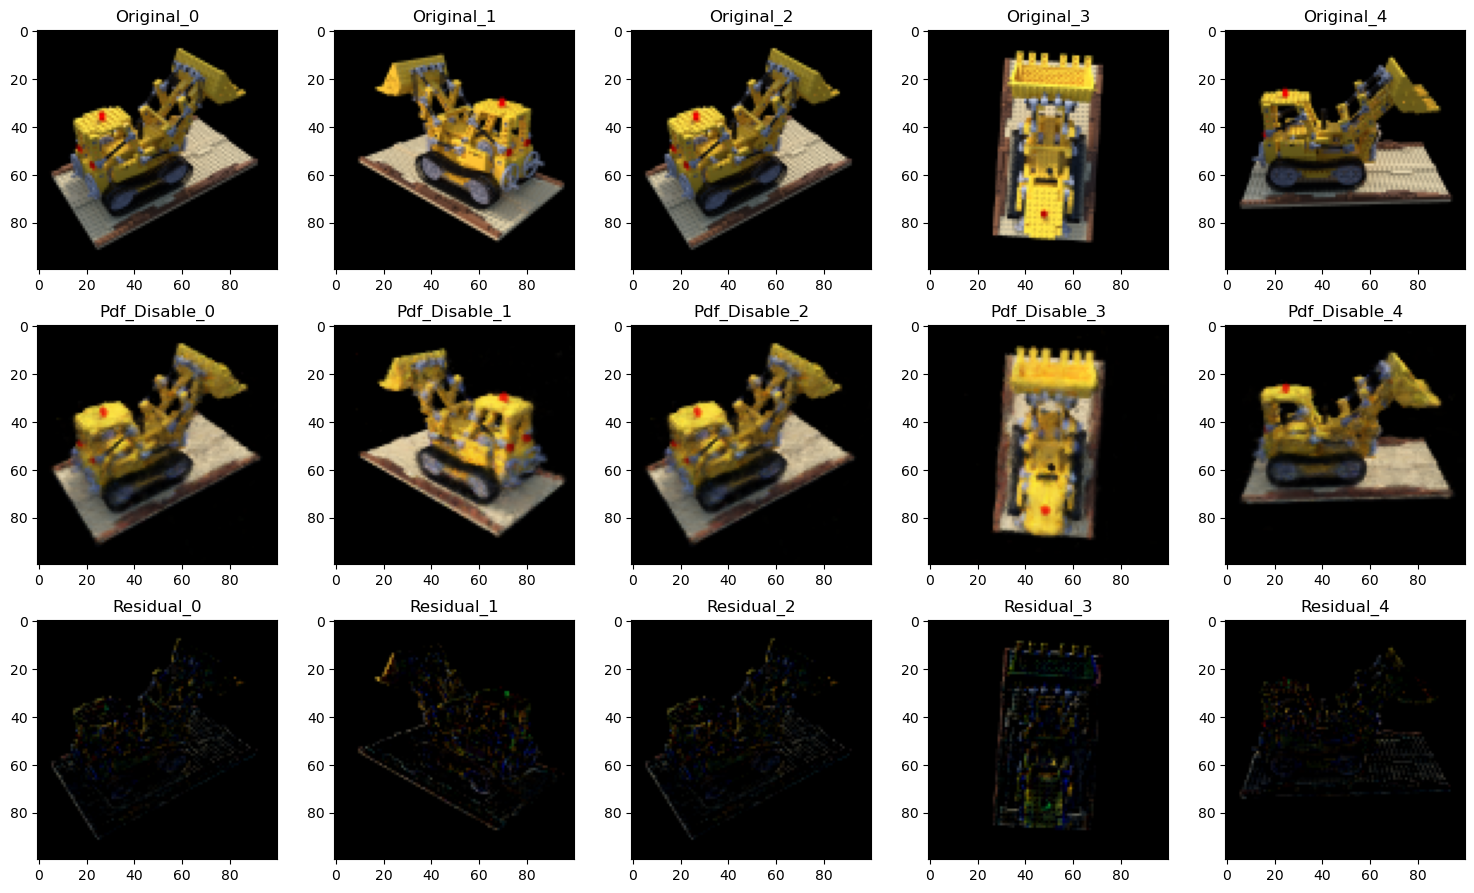

In [17]:
# Load the images
image_paths = [f'data_output_51_pdf/pdf_disabled/prediction_pdf_disable_{i}_51000.png' for i in range(5)]
images = [cv2.imread(i) for i in image_paths]

origin_paths = [f'data_output_51_pdf/pdf_disabled/original_pdf_disable_{i}_51000.png' for i in range(5)]
origin_images = [cv2.imread(i) for i in origin_paths]

residual_images = [calculate_residual(original_path,image_path) for original_path,image_path in zip(origin_paths,image_paths)]

fig, axs = plt.subplots(3, 5, figsize=(15, 9))
for i,image in enumerate(origin_images):
    axs[0,i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0,i].set_title(f"Original_{i}")
    
for i,image in enumerate(images):
    axs[1,i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[1,i].set_title(f"Pdf_Disable_{i}")
    
for i,image in enumerate(residual_images):
    axs[2,i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[2,i].set_title(f"Residual_{i}")
    
plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


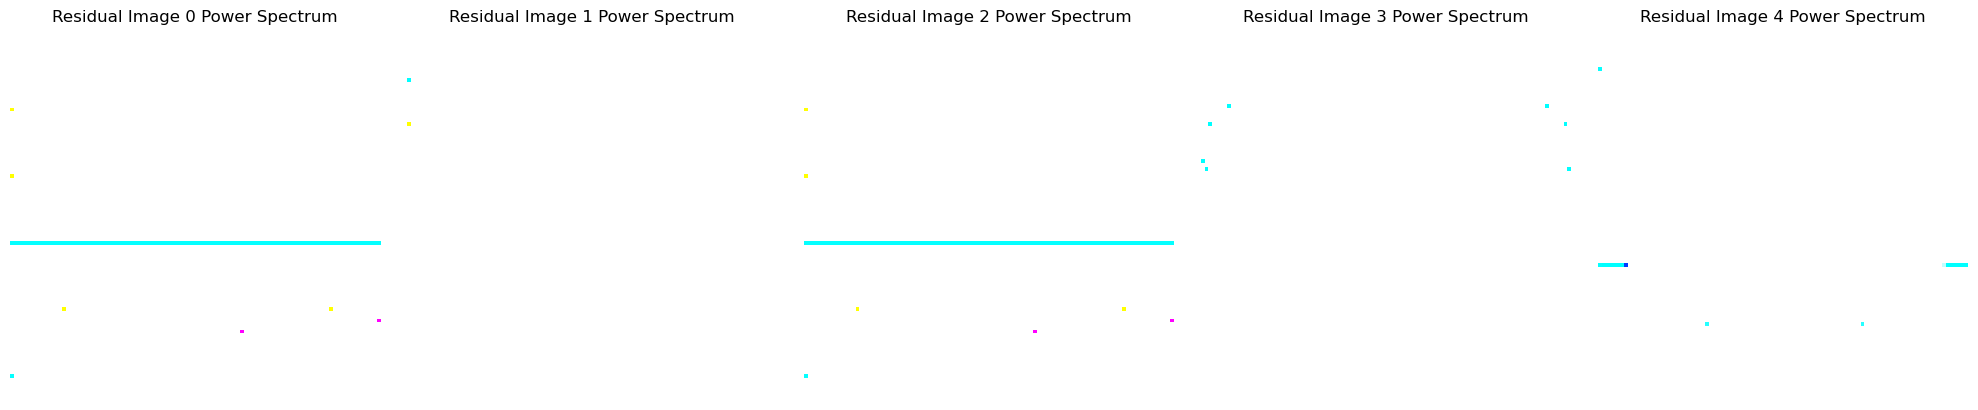

Residual Statistics:
[{'mean': 2.2365, 'std_dev': 7.101504611700256}, {'mean': 2.0301, 'std_dev': 7.483407912842918}, {'mean': 2.2365, 'std_dev': 7.101504611700256}, {'mean': 3.4378, 'std_dev': 10.780349306029002}, {'mean': 2.0045, 'std_dev': 6.243979480267372}]


In [18]:
# Function to calculate the power spectrum of the noise
def power_spectrum(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift) + 0.001)
    return magnitude_spectrum



# Calculate the power spectrum for each image
power_spectra = [power_spectrum(img) for img in residual_images]

# Plot the power spectra
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for i, spectrum in enumerate(power_spectra):
    axs[i].imshow(spectrum, cmap = 'gray')
    axs[i].set_title(f'Residual Image {i} Power Spectrum')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

# Now let's calculate and print some statistics of the noise.
noise_statistics = []

for img in residual_images:
    # Calculate the mean and standard deviation of the noise
    mean, std_dev = cv2.meanStdDev(img)
    noise_statistics.append({'mean': mean[0][0], 'std_dev': std_dev[0][0]})

print("Residual Statistics:")

print(noise_statistics)

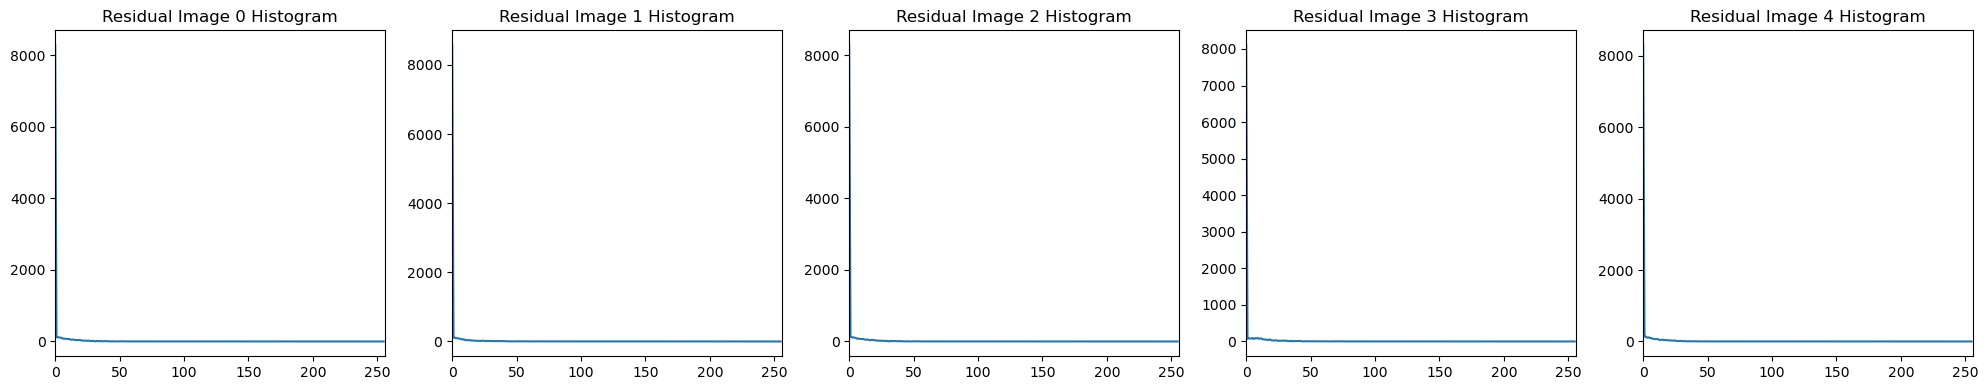

Skewness and Kurtosis


[(5.8124404502832805, 43.64399481540639),
 (7.209181176546527, 76.92362013816575),
 (5.8124404502832805, 43.64399481540639),
 (5.4665138043974855, 38.36450215892145),
 (5.606446448458907, 43.58110540721658)]

In [19]:
from scipy.stats import skew, kurtosis

# Calculate additional statistics for each image: skewness and kurtosis
additional_statistics = []

for image in residual_images:
    # Flatten the image to 1D array for statistical analysis
    image_flattened = image.flatten()
    # Calculate skewness and kurtosis
    image_skewness = skew(image_flattened)
    image_kurtosis = kurtosis(image_flattened)
    additional_statistics.append((image_skewness, image_kurtosis))

# Calculate the histograms of the images to observe the distribution of pixel intensities
histograms = []

for image in residual_images:
    # Calculate the histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    histograms.append(hist)

# Plot the histograms
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, ax in enumerate(axes):
    ax.plot(histograms[i])
    ax.set_title(f'Residual Image {i} Histogram')
    ax.set_xlim([0, 256])

plt.tight_layout()
plt.show()

# Output the additional noise statistics
print("Skewness and Kurtosis")
additional_statistics

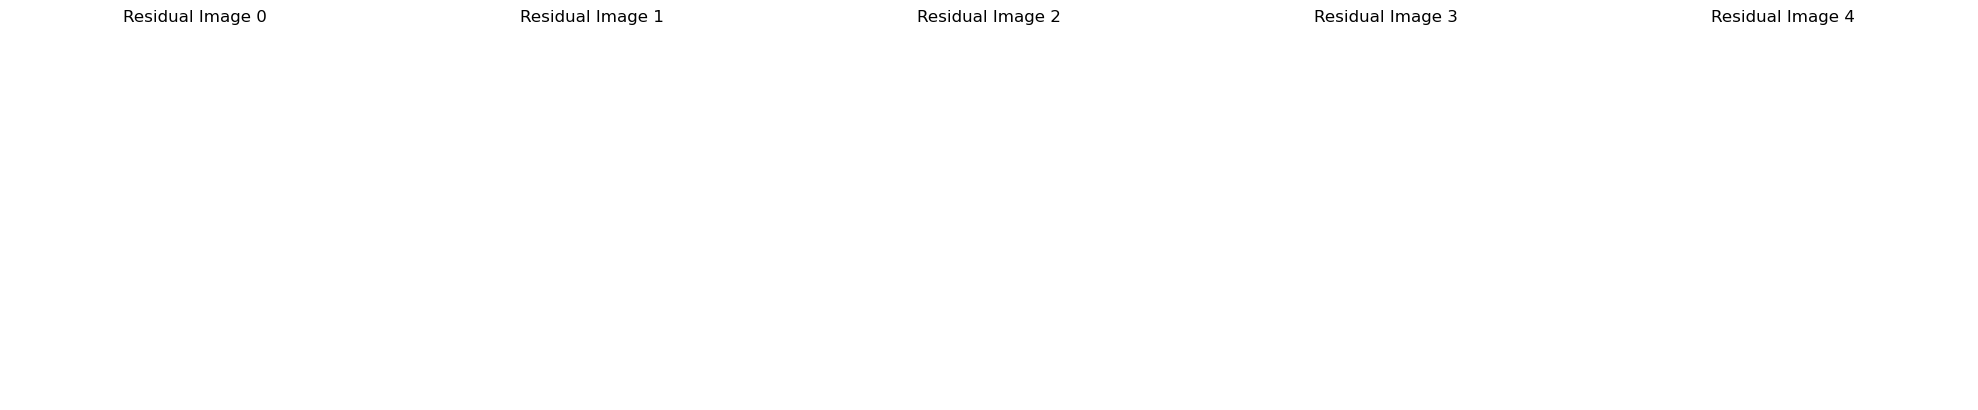

['data_output_51_pdf/pdf_disabled/Residual_0.png',
 'data_output_51_pdf/pdf_disabled/Residual_1.png',
 'data_output_51_pdf/pdf_disabled/Residual_2.png',
 'data_output_51_pdf/pdf_disabled/Residual_3.png',
 'data_output_51_pdf/pdf_disabled/Residual_4.png']

In [20]:
# Save the residual images and prepare their file paths for output
residual_paths = []
for i, residual in enumerate(residual_images):
    path = f'data_output_51_pdf/pdf_disabled/Residual_{i}.png'
    cv2.imwrite(path, residual)
    residual_paths.append(path)

# Plot the residual images
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, ax in enumerate(axes):
    ax.imshow(residual_images[i])
    ax.axis('off')
    ax.set_title(f'Residual Image {i}')

plt.tight_layout()
plt.show()

# Output the file paths of the residual images
residual_paths

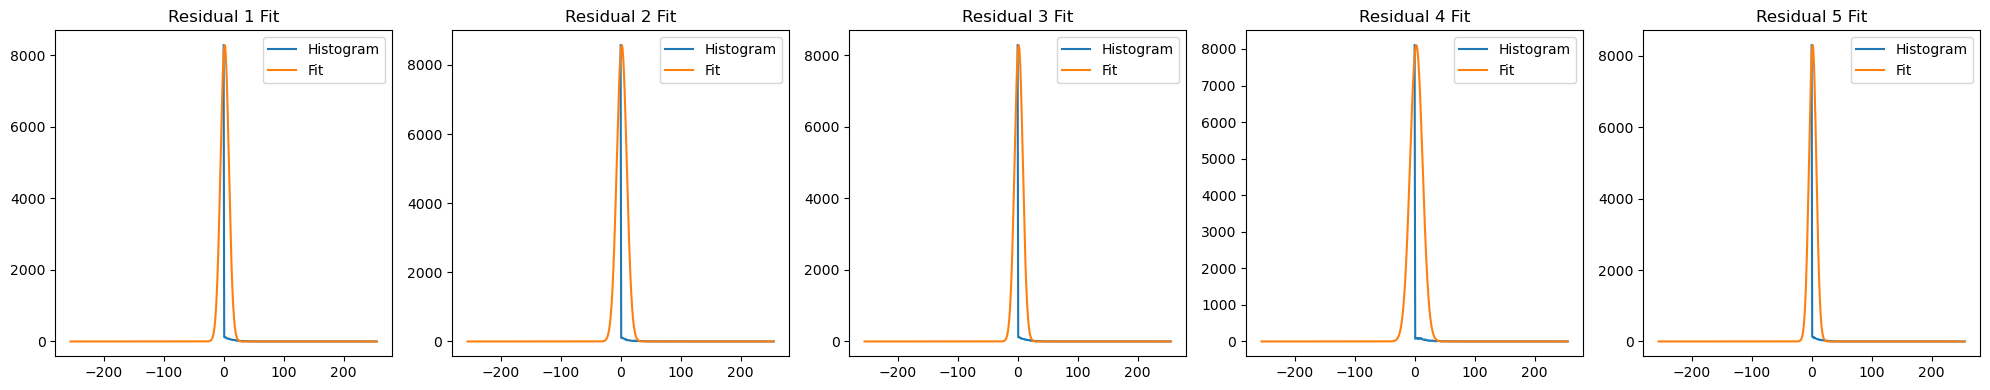

[(1.8, 6.9), (1.9, 8.3), (1.8, 6.9), (2.8, 10.4), (1.7, 6.1)]

In [21]:
# Function to analyze the distribution of the residuals
def analyze_residuals(residual_path):
    # Read the residual image
    residual = cv2.imread(residual_path, cv2.IMREAD_UNCHANGED)
    # Flatten the residual image to 1D array for statistical analysis
    residual_flattened = residual.flatten()
    # Calculate histogram of the residuals
    hist = cv2.calcHist([residual], [0], None, [256], [0, 256])
    return residual_flattened, hist

# Initialize lists to store analysis results
residual_data = []
histograms = []

# Analyze each residual image
for path in residual_paths:
    data, hist = analyze_residuals(path)
    residual_data.append(data)
    histograms.append(hist)

# Fit a normal distribution to the residuals
from scipy.stats import norm

# Parameters to store fitted distribution parameters
fitted_params = []

for data in residual_data:
    # Fit a normal distribution to the data
    mu, std = norm.fit(data)
    fitted_params.append((np.round(mu,1), np.round(std,1)))

# Plot the histograms and the fitted distributions
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

x = np.linspace(-255, 255, 1000)  # Range for plotting the fitted normal distributions

for i, ax in enumerate(axes):
    # Plot the histogram
    ax.plot(histograms[i], label='Histogram')
    # Plot the fitted distribution
    p = norm.pdf(x, fitted_params[i][0], fitted_params[i][1])
    ax.plot(x, p * np.max(histograms[i]) / np.max(p), label='Fit')  # Scale fitted line to histogram height
    ax.set_title(f'Residual {i+1} Fit')
    ax.legend()

plt.tight_layout()
plt.show()

# Output the fitted distribution parameters
fitted_params

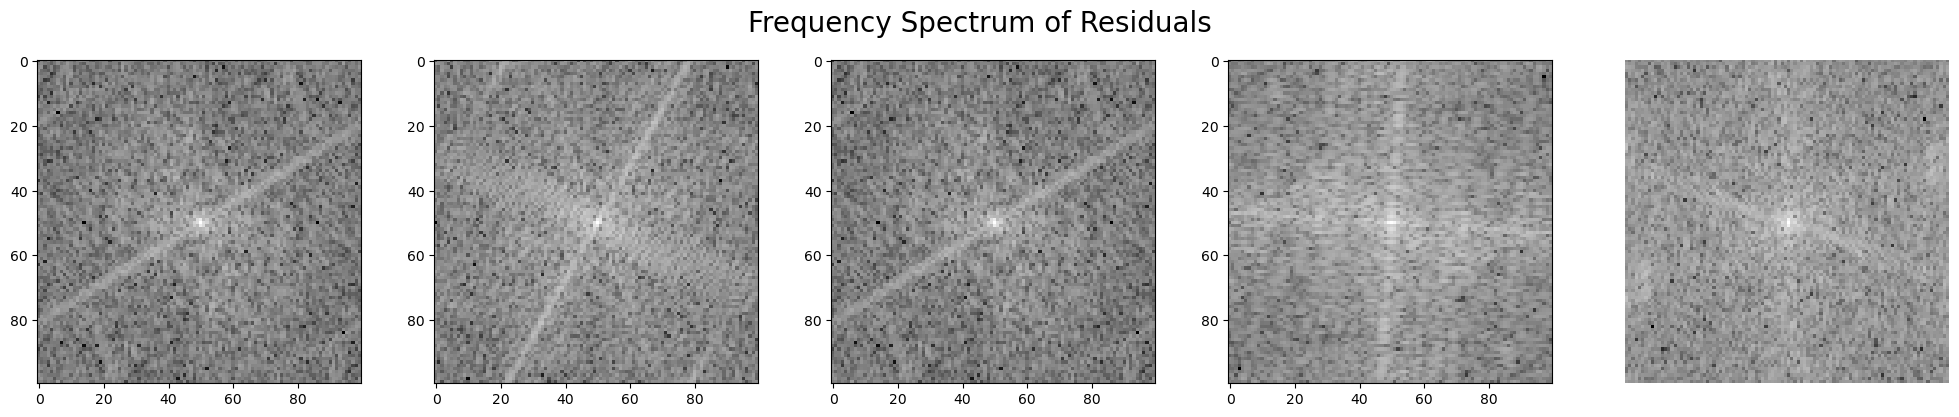

,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,ASM
0,73.556566,2.979192,0.765704,0.734692,0.370415,0.539772
1,97.501212,3.137778,0.784515,0.756674,0.416188,0.572555
2,73.556566,2.979192,0.765704,0.734692,0.370415,0.539772
3,129.296768,3.945859,0.765569,0.739746,0.506682,0.547224
4,60.638990,2.672121,0.780020,0.745787,0.325994,0.556198


In [22]:
from skimage.feature import graycomatrix, graycoprops
from numpy.fft import fft2, fftshift

# Function to calculate the frequency spectrum of an image using Fourier Transform
def calculate_frequency_spectrum(image):
    f = fft2(image)
    fshift = fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift))
    return magnitude_spectrum

# Function to calculate texture features using Grey Level Co-occurrence Matrix (GLCM)
def calculate_glcm_properties(image):
    # Compute GLCM on the image
    glcm = graycomatrix(image, distances=[1], angles=[0], symmetric=True, normed=True)
    # Compute GLCM properties
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    ASM = graycoprops(glcm, 'ASM')[0, 0]
    return contrast, dissimilarity, homogeneity, energy, correlation, ASM

# Choose one of the residual images to analyze

residual_images = [cv2.imread(residual_image_path, cv2.IMREAD_GRAYSCALE) for residual_image_path in residual_paths]

# Calculate frequency spectrum
frequency_spectrum = [calculate_frequency_spectrum(residual_image) for residual_image in residual_images]

# Calculate GLCM properties
glcm_properties = [calculate_glcm_properties(residual_image) for residual_image in residual_images]


# Plot the histograms and the fitted distributions
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
# Plot the frequency spectrum
for i, ax in enumerate(axes):
    # Plot the histogram
    ax.imshow(frequency_spectrum[i], cmap = "gray")

plt.suptitle('Frequency Spectrum of Residuals',fontsize = 20)
plt.axis('off')
plt.tight_layout()
plt.show()



# Output the GLCM properties
pd.DataFrame(glcm_properties,columns = ["Contrast","Dissimilarity","Homogeneity","Energy","Correlation","ASM"])

In [23]:
# Calculate statistical measures of the frequency spectra
spectra_stats = []
for spectrum in frequency_spectrum:
    mean = np.mean(spectrum)
    std = np.std(spectrum)
    max_val = np.max(spectrum)
    min_val = np.min(spectrum)
    spectra_stats.append({'mean': mean, 'std': std, 'max': max_val, 'min': min_val})

pd.DataFrame(spectra_stats)

,mean,std,max,min
0,6.180624,0.702228,10.076137,2.199216
1,6.298294,0.758879,10.173782,1.609438
2,6.180624,0.702228,10.076137,2.199216
3,6.370967,0.815615,10.536248,0.618395
4,6.041032,0.723991,9.974365,0.397137


In [24]:
# Function to calculate GLCM properties for all four angles (0, 45, 90, 135 degrees)
def calculate_glcm_properties_all_angles(image):
    # Compute GLCM on the image for four angles
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Angles in radians: 0, 45, 90, 135 degrees
    glcm = graycomatrix(image, distances=[1], angles=angles, symmetric=True, normed=True)
    # Compute GLCM properties for each angle
    properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
    glcm_properties = {prop: [graycoprops(glcm, prop)[0, i] for i in range(4)] for prop in properties}
    return glcm_properties

# Calculate GLCM properties for all angles for each residual image
glcm_properties_all_images = [calculate_glcm_properties_all_angles(cv2.imread(path, cv2.IMREAD_GRAYSCALE)) for path in residual_paths]

pd.DataFrame(glcm_properties_all_images)

,contrast,dissimilarity,homogeneity,energy,correlation,ASM
0,"[73.5565656565654, 82.45832057953206, 70.85414...","[2.979191919191909, 3.212937455361669, 3.01979...","[0.765704273032457, 0.7528356796826884, 0.7603...","[0.7346918712626626, 0.7239248822155634, 0.728...","[0.3704154212882328, 0.3005842477489454, 0.393...","[0.5397721456994328, 0.5240672350908173, 0.531..."
1,"[97.50121212121107, 111.80634629119302, 94.942...","[3.1377777777777562, 3.424344454647438, 3.1963...","[0.7845147454202914, 0.77446051046929, 0.78248...","[0.7566736683022786, 0.746726431950725, 0.7533...","[0.41618764666332175, 0.33666455194869344, 0.4...","[0.5725550403020268, 0.5576003641738607, 0.567..."
2,"[73.5565656565654, 82.45832057953206, 70.85414...","[2.979191919191909, 3.212937455361669, 3.01979...","[0.765704273032457, 0.7528356796826884, 0.7603...","[0.7346918712626626, 0.7239248822155634, 0.728...","[0.3704154212882328, 0.3005842477489454, 0.393...","[0.5397721456994328, 0.5240672350908173, 0.531..."
3,"[129.2967676767667, 193.17865523925678, 107.03...","[3.945858585858564, 5.119885725946226, 3.44969...","[0.7655687373048233, 0.7447274429914578, 0.778...","[0.7397458420467473, 0.7229573235930828, 0.749...","[0.5066820511150011, 0.26950347454748175, 0.59...","[0.5472239108254512, 0.5226672917368734, 0.562..."
4,"[60.638989898989756, 71.28068564432145, 53.713...","[2.672121212121201, 3.1098867462503637, 2.6010...","[0.7800199650278898, 0.7521883236235907, 0.770...","[0.7457867440257631, 0.7215028782700702, 0.738...","[0.32599384462701836, 0.21480446636127812, 0.4...","[0.556197867564549, 0.5205664033519957, 0.5454..."


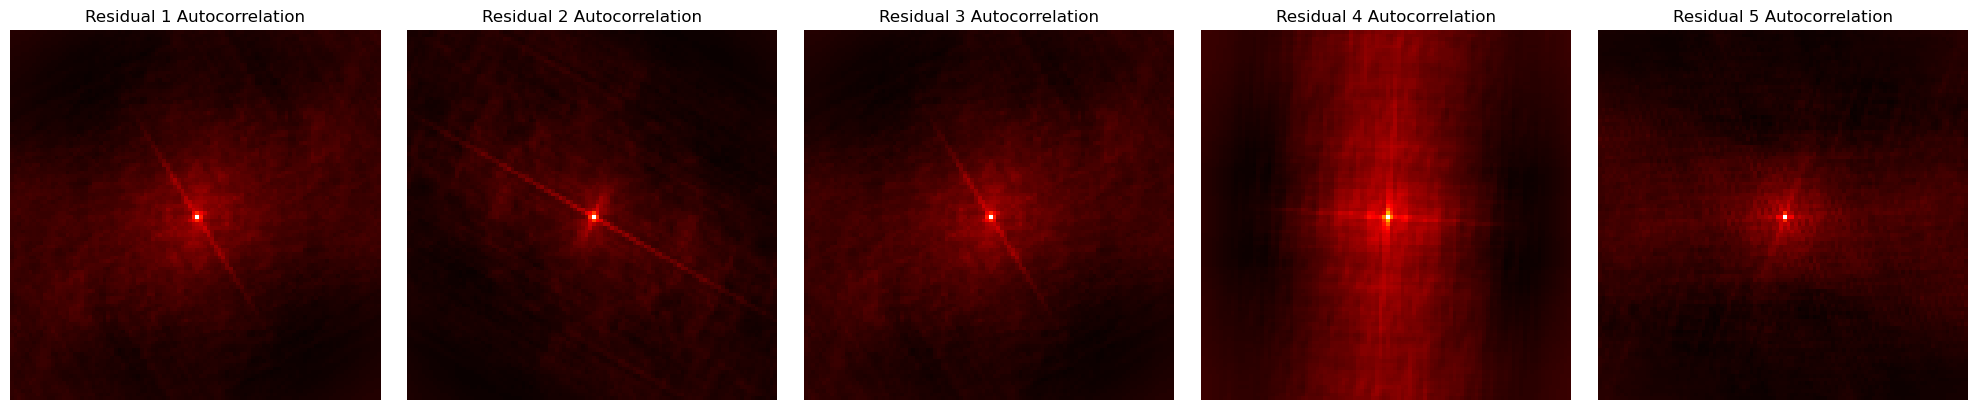

In [25]:
from scipy.signal import correlate2d

# Function to calculate 2D autocorrelation of an image
def calculate_autocorrelation(image):
    # Normalize image
    image_normalized = image - np.mean(image)
    # Calculate autocorrelation using correlate2d
    autocorr = correlate2d(image_normalized, image_normalized, mode='full')
    # Normalize autocorrelation by the maximum value to bring the values between [0, 1]
    autocorr_normalized = autocorr / np.max(autocorr)
    return autocorr_normalized

# Calculate 2D autocorrelation for each residual image
autocorrelations = [calculate_autocorrelation(cv2.imread(path, cv2.IMREAD_GRAYSCALE)) for path in residual_paths]

# Plot the 2D autocorrelation for each residual image
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axes):
    # Select the central part of the autocorrelation for display
    center = tuple(map(lambda x: x // 2, autocorrelations[i].shape))
    extent = 50  # We will display a 50x50 region around the center
    autocorr_display = autocorrelations[i][
        center[0]-extent:center[0]+extent, 
        center[1]-extent:center[1]+extent
    ]
    ax.imshow(autocorr_display, cmap='hot')
    ax.axis('off')
    ax.set_title(f'Residual {i+1} Autocorrelation')

plt.tight_layout()
plt.show()
